In [42]:
# import required libraries 
import numpy as np
import random
import matplotlib.pyplot as plt

In [43]:
# Making the Graph  
# The user can choose whether to use the default 10 x 10 matrix or enter a fresh one 
# Takes parameter 'new' which is taken as input from the user 
# 'new' is zero by default
# Returns the graph and number of vertices 
def graph_input(new=0,size=50):
    if new==0:
        Graph_matrix=[]
        Graph_matrix.append([ -1., 467., 974.,  12., 978., 987., 978., 876., 123., 145.])
        Graph_matrix.append( [467. , -1. ,356.  ,97. ,345. ,234. ,532., 567., 987. ,759.])            
        Graph_matrix.append([974. ,356. , -1. ,567. ,876. ,987. ,789. ,234. ,345. ,478.])             
        Graph_matrix.append([ 12. , 97. ,567. , -1. ,678. ,754.  ,54. ,876.  ,76. ,489.])             
        Graph_matrix.append([978. ,345. ,876. ,678. , -1. ,123. ,987. , 65. ,756. ,458.])             
        Graph_matrix.append([987. ,234. ,987. ,754. ,123. , -1. , 34. ,987. ,946. ,787.]) 
        Graph_matrix.append([978. ,532. ,789. , 54. ,987. , 34. , -1. ,456. ,386. ,864.])
        Graph_matrix.append([876. ,567. ,234. ,876. , 65. ,987. ,456. , -1. ,487. ,456.]) 
        Graph_matrix.append([123. ,987. ,345. , 76. ,756. ,946. ,386. ,487. , -1. ,986.]) 
        Graph_matrix.append([145. ,759. ,478. ,489. ,458. ,787. ,864. ,456. ,986. , -1.])          
        vertices=10
        return np.asarray(Graph_matrix),vertices
    if new==1:
        return np.random.randint(100,size=(size,size))*10,size
    vertices = int(input("Enter the Number of cities "))
    Graph_matrix=np.ones((vertices,vertices)) *-1
    for i in range(vertices):
        for j in range(i):
            print("Enter the Distance Between "+ str(i+1) +" and " + str(j+1)+ "(-1 if no connections between them ) :")
            Graph_matrix[i][j]=int(input())
            Graph_matrix[j][i]=Graph_matrix[i][j]
    return Graph_matrix,vertices    

In [44]:
# Create Random solutions as the starting population 
# Takes the number of starting popoulaion and number of vertices to generate samplr population
# Returns the population as a numpy 2d array
def create_population(population_no,vertices):
    x=[i for i in range(vertices)]
    population=[]
    for i in range(population_no):
        a=random.sample(x,vertices)
        population.append(a)
    return np.asarray(population)    

In [45]:
# Evaluates the fitness values for every person in population
# Initially the max value of distance is calculated by taking the max value in the graph and multiplying it with 
# number of travels , this value is guaranteed to be greater than any possible path 
# Then , the total disance in each path is calculated 
# Fitness function is max_distance - calculated distance 
# Returns fitness values 
def fitness_value(population,Graph_matrix):
    vertices=Graph_matrix.shape[0]
    population_no=population.shape[0]
    max_fitness=np.max(Graph_matrix)*(vertices-1)
    fitness_values=[0 for i in range(population_no)]
    for i in range(population_no):
        curr_pop = population[i]
        for j in range(vertices-1):
            if(Graph_matrix[curr_pop[j]][curr_pop[j+1]]==-1):
                fitness_values[i]=9999
                break
            else:
                fitness_values[i]+=Graph_matrix[curr_pop[j]][curr_pop[j+1]]
        #print(fitness_values[i])
        fitness_values[i]+=Graph_matrix[curr_pop[vertices-1]][curr_pop[0]]
        fitness_values[i]=(1/fitness_values[i])*max_fitness
    return fitness_values      

In [46]:
graph,v=graph_input()
print(graph)
population=create_population(10,v)
fitness_value(population,graph)

[[ -1. 467. 974.  12. 978. 987. 978. 876. 123. 145.]
 [467.  -1. 356.  97. 345. 234. 532. 567. 987. 759.]
 [974. 356.  -1. 567. 876. 987. 789. 234. 345. 478.]
 [ 12.  97. 567.  -1. 678. 754.  54. 876.  76. 489.]
 [978. 345. 876. 678.  -1. 123. 987.  65. 756. 458.]
 [987. 234. 987. 754. 123.  -1.  34. 987. 946. 787.]
 [978. 532. 789.  54. 987.  34.  -1. 456. 386. 864.]
 [876. 567. 234. 876.  65. 987. 456.  -1. 487. 456.]
 [123. 987. 345.  76. 756. 946. 386. 487.  -1. 986.]
 [145. 759. 478. 489. 458. 787. 864. 456. 986.  -1.]]


[1.3945054945054944,
 1.318539409232596,
 1.2332361516034984,
 1.2465618860510808,
 1.4540841381568177,
 1.376355748373102,
 1.8143382352941178,
 2.507905138339921,
 1.8622641509433961,
 2.235279315551082]

In [47]:
par=select_parents(population,graph)
print(par)
make_random_pairs(par,len(par))

[7, 9, 5, 8, 6]


[[7, 9], [6, 7], [7, 8], [5, 8], [5, 9]]

In [48]:
# Calcuates the probability of selection of each person for mating
# Takes population matrix and Graph matrix as inputs 
# Probability is found bt calculating the sum of fitness values and dividing each fitness value with it 
# Returns the probaility
def probs(population,Graph_matrix):
    population_no=population.shape[0]
    fitness_values=fitness_value(population=population,Graph_matrix=Graph_matrix)
    pop_sum=np.sum(fitness_values)
    prob=fitness_values/pop_sum
    return prob

In [49]:
# Picks a random index based on its probaility of selection 
# This demonstrates Roulette selection 
# Works by taking the sum and partitioning the number line according to the cummulative sum at each point .
# A random number is chosen from 0 to sum and the corresponing partition the random number belongs to is returned
# as the pick 
# Retturns the index of the selected parent 
def weighted_random(probs):
    max_ =np.sum(probs)
    pick = random.uniform(0,max_)
    curr=0
    for i,pr in enumerate(probs):
        curr+=pr
        if curr> pick :
            return i

In [50]:
# Selects parents for crossover  
# Takes the population and the graph matrix as inputs
# Selects n/2 parents using weighted_random
# Returns a list of selected parents 
def select_parents(population,Graph_matrix):
    population_no=population.shape[0]
    prob =probs(population,Graph_matrix)
    no_of_parents=population_no//2
    parents=[]
    
    while(no_of_parents>0):
        parent=weighted_random(prob**3)
        if(parent not in parents):
            parents.append(parent)
            no_of_parents-=1
    return parents        

In [51]:
# Makes random pairs for crossover 
# Uses random.sample to generate random pairs 
# Returns a list of selected pairs as tuples 
def make_random_pairs(parents,no_of_pairs):
    pairs=[]
    while(no_of_pairs>0):
        curr_pair=tuple(random.sample(parents,2))
        curr_pair=sorted(curr_pair)
        if curr_pair not in pairs:
            pairs.append(curr_pair)
            no_of_pairs-=1
    return pairs    
    

In [52]:
# Applies crossover on two parents to generate 2 children 
# Uses the PMX crossover algorithm 
# Returns the generated children
def cxPartialyMatched(ind1,ind2):
    """Executes a partially matched crossover (PMX) on the input individuals.
    The two individuals are modified in place. This crossover expects
    :term:`sequence` individuals of indices, the result for any other type of
    individuals is unpredictable.
    :param ind1: The first individual participating in the crossover.
    :param ind2: The second individual participating in the crossover.
    :returns: A tuple of two individuals.
    Moreover, this crossover generates two children by matching
    pairs of values in a certain range of the two parents and swapping the values
    of those indexes. For more details see [Goldberg1985]_.
    This function uses the :func:`~random.randint` function from the python base
    :mod:`random` module.
    .. [Goldberg1985] Goldberg and Lingel, "Alleles, loci, and the traveling
       salesman problem", 1985.
    """
    
    size = ind1.shape[0]
    p1, p2 = [0] * size, [0] * size

    # Initialize the position of each indices in the individuals
    for i in range(size):
        p1[ind1[i]] = i
        p2[ind2[i]] = i
    # Choose crossover points
    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else:  
        # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1

    # Apply crossover between cx points
    for i in range(cxpoint1, cxpoint2):
        # Keep track of the selected values
        temp1 = ind1[i]
        temp2 = ind2[i]
        # Swap the matched value
        ind1[i], ind1[p1[temp2]] = temp2, temp1
        ind2[i], ind2[p2[temp1]] = temp1, temp2
        # Position bookkeeping
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]

    return ind1

In [53]:
# Applies mutation on the offspring
# Takes a list of offsprings as input 
# There is a 0.5% chance of mutation for each offspring
# Returns Mutated offsprings 
def mutation(offsprings):
    n=offsprings.shape[1]
    for offspring in offsprings:
        chance = random.uniform(0,100)
        if chance > 99.5:
            random_number1 = random.randrange(n)
            random_number2 = random.randrange(n)
            offspring[random_number1],offspring[random_number2]=offspring[random_number2],offspring[random_number1]
       # print(random_number,offspring)
    return offsprings    

In [54]:
# Find the highest fitness value in the population 
# Takes the population and the graph_matrix as inputs 
# Returns the Best fitness value and its corresponding index
def max_fitness(population,Graph_matrix):
    return np.max(fitness_value(population,Graph_matrix)),np.argmax(fitness_value(population,Graph_matrix))

In [55]:
# Applies crossover on two parents to generate 2 children 
# Uses the OX crossover algorithm 
# Returns the generated children
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [56]:
# Function to Select Which Crossover to use 
# Returns the child list
def crossover(p1,p2,typ="OX"):
    if typ=="OX":
        return breed(p1,p2)
    else :
        return cxPartialyMatched(p1,p2)

In [91]:
# Function to execute the Genetic Algorithm
# Takes number of iterations as input , default is 100
# Returns the best path and the Progress showing the best path at each iteration 
def main(no_of_iterations=100):
    inp=int(input("Use Default Graph(0 or 1)or or Enter a new Graph(2) :"))
    
    Graph_matrix,vertices=graph_input(inp)
    print("GRAPH MATRIX")
    print(Graph_matrix)
    population_no = int(input("Enter the starting Population size : "))
    population=create_population(population_no,vertices)
    print(" The  Highest Fitness Value in the beginning is :"+str(max_fitness(population,Graph_matrix)[0]))
    overall_highest,itera=max_fitness(population,Graph_matrix)
    best_path = population[itera]
    prog=[]
    for i in range(no_of_iterations):
        np.random.shuffle(population)
        parents=select_parents(population,Graph_matrix)
        prents=[]

        for j in parents:
            prents.append(population[j])
        pairs=make_random_pairs(parents,len(parents))
        #print(pairs)
        offsprings=[]
        for pair in pairs:
            off2 = crossover(population[pair[0]],population[pair[1]])
            offsprings.append(off2)
            #print(off2)
            #offsprings_temp.append(off2)
            
        offsprings=np.asarray(offsprings)
        offsprings=mutation(offsprings)
        #print(" Offsprings :",offsprings)
        #print(" Parents : ",np.asarray(prents))
        offsprings=np.concatenate((prents,offsprings),axis=0)
        population=offsprings
        max_value,ind=max_fitness(offsprings,Graph_matrix)
        #print(max_value)
        if max_value>overall_highest:
            overall_highest,ind=max_fitness(offsprings,Graph_matrix)
            itera=i
            best_path=offsprings[ind]
        prog.append(max_value)
        #print(" Population : ",population,"\n")
        print("Best Fitness Value at iteration "+str(i+1)+" is "+str(max_value))
        
    print("\nHIGHEST FITNESS OVERALL :"+str(overall_highest)+" AT ITERATION "+str(itera+1))
    #best_path.reshape((vertices,1))
    best_path=np.append(best_path,values=best_path[0])
   # print(best_path.shape)
    return best_path,prog

In [92]:
best_p,prog=main(200)


Use Default Graph(0 or 1)or or Enter a new Graph(2) :1
GRAPH MATRIX
[[180   0 830 ... 500 100  80]
 [190 190 990 ... 130 100 380]
 [920 850 850 ... 400 410 420]
 ...
 [ 70 240 130 ... 640 450 600]
 [670 980  10 ... 650 820 190]
 [120   0 500 ... 890 770 960]]
Enter the starting Population size : 3000
 The  Highest Fitness Value in the beginning is :2.9364406779661016
Best Fitness Value at iteration 1 is 2.970606246172688
Best Fitness Value at iteration 2 is 2.970606246172688
Best Fitness Value at iteration 3 is 2.970606246172688
Best Fitness Value at iteration 4 is 2.970606246172688
Best Fitness Value at iteration 5 is 2.970606246172688
Best Fitness Value at iteration 6 is 3.066371681415929
Best Fitness Value at iteration 7 is 3.066371681415929
Best Fitness Value at iteration 8 is 3.066371681415929
Best Fitness Value at iteration 9 is 3.0760938490805327
Best Fitness Value at iteration 10 is 3.1540962288686605
Best Fitness Value at iteration 11 is 3.087842138765118
Best Fitness Value at

Best Fitness Value at iteration 140 is 5.133333333333334
Best Fitness Value at iteration 141 is 5.133333333333334
Best Fitness Value at iteration 142 is 5.133333333333334
Best Fitness Value at iteration 143 is 5.133333333333334
Best Fitness Value at iteration 144 is 5.133333333333334
Best Fitness Value at iteration 145 is 5.133333333333334
Best Fitness Value at iteration 146 is 5.133333333333334
Best Fitness Value at iteration 147 is 5.133333333333334
Best Fitness Value at iteration 148 is 5.133333333333334
Best Fitness Value at iteration 149 is 5.133333333333334
Best Fitness Value at iteration 150 is 5.133333333333334
Best Fitness Value at iteration 151 is 5.133333333333334
Best Fitness Value at iteration 152 is 5.171641791044776
Best Fitness Value at iteration 153 is 5.171641791044776
Best Fitness Value at iteration 154 is 5.171641791044776
Best Fitness Value at iteration 155 is 5.171641791044776
Best Fitness Value at iteration 156 is 5.634146341463414
Best Fitness Value at iteration

In [93]:
print(" Best Path is : ",best_p)

 Best Path is :  [26 12 39  1  9 17  3 20 44 16  4 31 40  0 43 21 32 29 25  6 46 45 35 15
 30  8 38  5  2 11 28 47 37 18  7 48 33 36 14 41 34 24 23 49 13 10 42 22
 27 19 26]


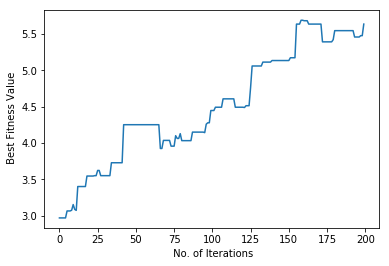

In [94]:
plt.plot(range(200),prog)
plt.ylabel(" Best Fitness Value")
plt.xlabel(" No. of Iterations")
plt.show()